In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

base_dir = "./CTCI/Panorama CTCI/Diseño/Gráficos/Contexto nacional"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# This cell set up all the required styling

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager, FontProperties
from matplotlib.patches import FancyBboxPatch

MAIN_COLOR = "#37539C"

BLUE_PALETTE = [
    "#869CD4",
    "#4969BE",
    "#4062BB",
    "#354F95",
    "#2D4175",
    "#27355A"
]

COLOR_PALETTE = [
    MAIN_COLOR,
    "#59C3C3",
    "#F45B69",
    "#52489C",
    "#EBEBEB",
    "#4062BB",
    "#46B1C9",
    "#84C0C6",
    "#9FB7B9",
    "#BCC1BA",
    "#F2E2D2"
]

def install_open_sans():
  """Install Open Sans fonts from directory, and set them as the default
  """
  fonts_dir = "./CTCI/Panorama CTCI/Diseño/open_sans_fonts"
  for font_path in os.listdir(fonts_dir):
    full_path = os.path.join(fonts_dir, font_path)
    fontManager.addfont(full_path)

def set_properties(font_family, main_color, color_palette):
  # Set font
  mpl.rc('font', family=font_family)
  # Set font weight to bold in everything
  mpl.rcParams["font.weight"] = "bold"
  mpl.rcParams["font.weight"] = "bold"
  mpl.rcParams["axes.titleweight"] = "bold"
  mpl.rcParams["axes.labelweight"] = "bold"

  # Set color of text, labels and ticks
  mpl.rcParams['text.color'] = main_color
  mpl.rcParams['axes.labelcolor'] = main_color
  mpl.rcParams['xtick.color'] = main_color
  mpl.rcParams['ytick.color'] = main_color

  # Set default colormap
  mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=color_palette)

  # Set thant only left and bottom plot spines should be visible
  # (instead of a whole square around the plot)
  mpl.rcParams['axes.spines.left'] = True
  mpl.rcParams['axes.spines.bottom'] = True
  mpl.rcParams['axes.spines.right'] = False
  mpl.rcParams['axes.spines.top'] = False

  # Set horizontal grid
  mpl.rcParams["axes.grid"] = True
  mpl.rcParams["axes.grid.axis"] = "y"
  mpl.rcParams["grid.linestyle"] = "--"

  # Set default linestyle and marker
  mpl.rcParams["lines.linestyle"] = "-"
  mpl.rcParams["lines.marker"] = "o"

  # Set default DPI for image saving (300 is the mininum recommended for printing)
  mpl.rcParams['savefig.dpi'] = 300


install_open_sans()
set_properties("Open Sans", MAIN_COLOR, COLOR_PALETTE)


def round_corners(ax):
  new_patches = []
  old_bottom, old_top = ax.get_ylim()
  for patch in reversed(ax.patches):
      bb = patch.get_bbox()
      if bb.height == 0:
        new_patches.append(patch)
        continue
      color=patch.get_facecolor()
      p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                          abs(bb.width), abs(bb.height),
                          boxstyle="round,pad=-0.0040,rounding_size=0.1",
                          ec="none", fc=color,
                          mutation_aspect=4
                          )
      patch.remove()
      new_patches.append(p_bbox)
  for patch in new_patches:
      ax.add_patch(patch)

  # Fix ylim
  ax.set_ylim(old_bottom, old_top)

### PIB per capita Chile
https://datos.bancomundial.org/indicator/NY.GDP.PCAP.CD?end=2022&locations=CL&start=2012

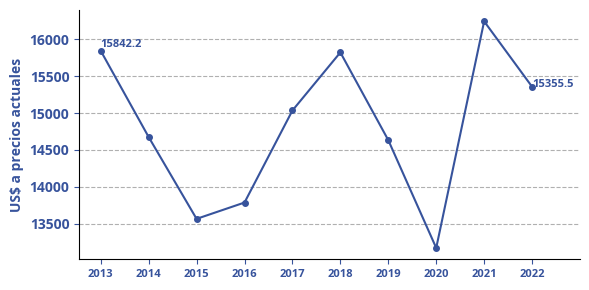

In [27]:
pib_pc_chile = [15842.2, 14675.2, 13567.4, 13788.2, 15034.1, 15820,
                14632.7, 13173.8, 16240.6, 15355.5]
years = list(range(2013,2023))
fig, ax = plt.subplots(figsize=(6,3))

ax.plot(years, pib_pc_chile, '-o', markersize=4)
#ax.grid(axis='y', linestyle='--')
ax.set_ylabel('US$ a precios actuales')
ax.annotate(pib_pc_chile[0], (years[0], pib_pc_chile[0]+50), fontsize=8)
ax.annotate(pib_pc_chile[-1], (years[-1], pib_pc_chile[-1]), fontsize=8)
ax.set_xlim(right=2023)
ax.set_xticks(years)
ax.tick_params(axis='x', labelsize=8)
plt.tight_layout()
plt.savefig(base_dir+'/pib_pc_chile.png')
plt.savefig(base_dir+'/pib_pc_chile.svg')
plt.show()

### índice de Gini de Chile

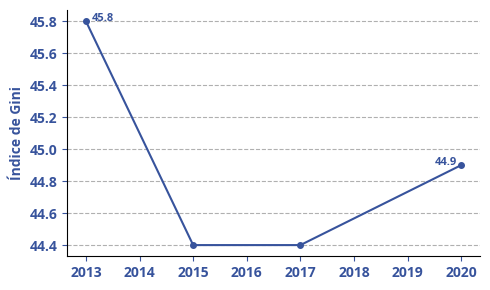

In [28]:
y = [45.8 , 44.4, 44.4, 44.9]
years = [2013, 2015, 2017, 2020]

fig, ax = plt.subplots(figsize=(5,3))
ax.plot(years,y, markersize=4)
#plt.scatter(years, y, #marker='*',
          #  s=2)#, color='blue')
ax.set_ylabel('Índice de Gini')
ax.annotate(y[0], (years[0]+0.1, y[0]), fontsize=8)
ax.annotate(y[-1], (years[-1]-0.5, y[-1]), fontsize=8)
#plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig(base_dir + '/gini.png')
plt.savefig(base_dir + '/gini.svg')

### emisiones CO2 (toneladas métricas per cápita) en Chile

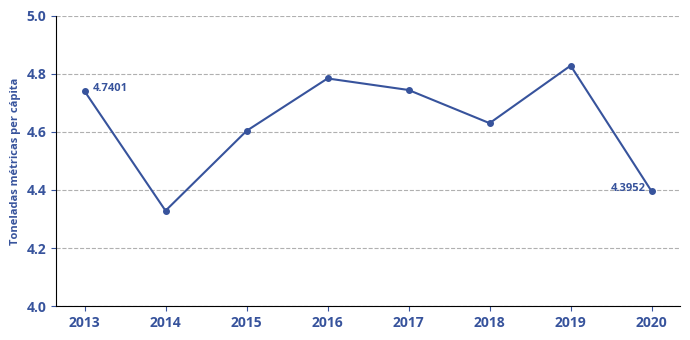

In [29]:
co2 = [4.7401,	4.3286,	4.6032,	4.7835,	4.7438,	4.6297,	4.8276,	4.3952]
years = list(range(2013,2021))
fig, ax = plt.subplots(figsize=(7,3.5))
ax.plot(years,co2, markersize=4)
ax.set_ylim((4,5))
ax.set_ylabel('Toneladas métricas per cápita', fontsize=8)
ax.grid(axis='y', linestyle='--')
ax.annotate(co2[0], (years[0]+0.1, co2[0]), fontsize=8)
ax.annotate(co2[-1], (years[-1]-0.5, co2[-1]), fontsize=8)
plt.tight_layout()
plt.savefig(base_dir+'/co2.png')
plt.savefig(base_dir+'/co2.svg')
plt.show()

### Tasa de población activa en Chile (% de la población total mayor de 15 años), 2012 - 2020.
Porcentaje de la población total mayor de 15 años


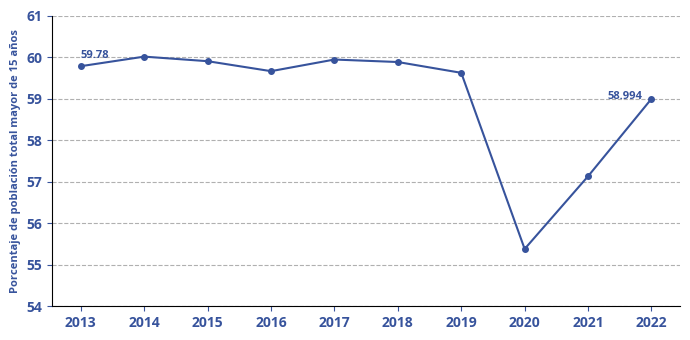

In [30]:
years = list(range(2013, 2023))
pob = [59.78, 60.01, 59.9, 59.66, 59.94, 59.88, 59.62, 55.38, 57.13, 58.994]
fig,ax = plt.subplots(figsize=(7,3.5))
ax.plot(years,pob, #'-o',
         markersize=4)
ax.set_ylim((54,61))
ax.set_ylabel('Porcentaje de población total mayor de 15 años', fontsize=8)
ax.grid(axis='y', linestyle='--')
ax.set_xticks(years)
ax.annotate(pob[0], (years[0], pob[0]+0.2), fontsize=8)
ax.annotate(pob[-1], (years[-1]-0.7, pob[-1]), fontsize=8)
plt.tight_layout()
plt.savefig(base_dir+'/pob_activa.png')
plt.savefig(base_dir+'/pob_activa.svg')

plt.show()

### Exportaciones de productos de alta tecnología (% de las exportaciones de productos manufacturados) - Chile

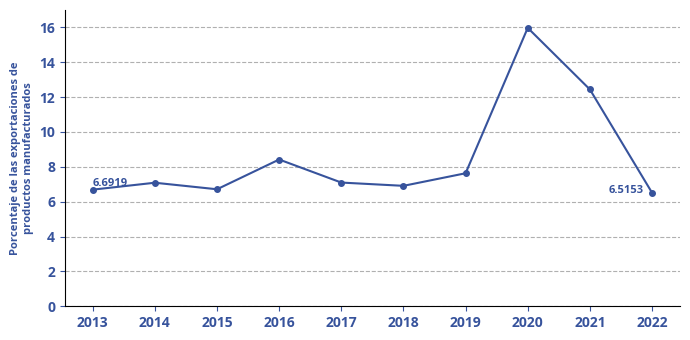

In [31]:
exp_alta_tec = [6.6919, 7.0889, 6.7137, 8.4210, 7.0987,
                6.9108, 7.6327, 15.9750, 12.4417, 6.5153]
years = list(range(2013, 2023))

fig, ax = plt.subplots(figsize=(7,3.5))
ax.plot(years, exp_alta_tec, #'-o',
         markersize=4)
ax.set_ylim((0,17))
ax.set_ylabel('Porcentaje de las exportaciones de\nproductos manufacturados', fontsize=8)
#plt.grid(axis='y', linestyle='--')
ax.set_xticks(years)
ax.annotate(exp_alta_tec[0], (years[0], exp_alta_tec[0]+0.2), fontsize=8)
ax.annotate(exp_alta_tec[-1], (years[-1]-0.7, exp_alta_tec[-1]), fontsize=8)
plt.tight_layout()
plt.savefig(base_dir+'/exp_alta_tec.png')
plt.savefig(base_dir+'/exp_alta_tec.svg')

plt.show()

### Inversión extranjera directa, entrada neta de capital (% del PIB) - Chile

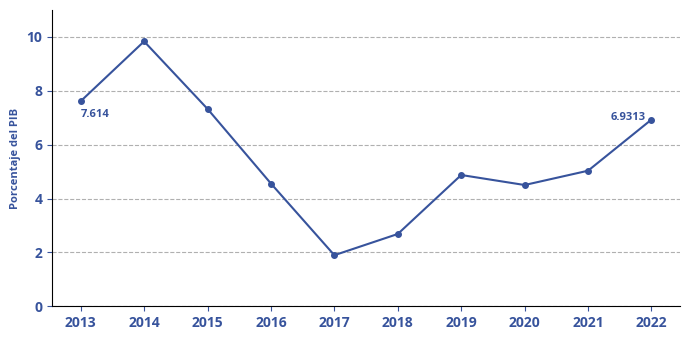

In [32]:
inv = [7.6140, 9.8350, 7.3278, 4.5570, 1.8965,
       2.6846, 4.8741, 4.5023, 5.0328, 6.9313]

fig, ax = plt.subplots(figsize=(7,3.5))
ax.plot(years, inv, #'-o',
         markersize=4)
ax.set_ylim((0,11))
ax.set_ylabel('Porcentaje del PIB', fontsize=8)
#plt.grid(axis='y', linestyle='--')
ax.set_xticks(years)
ax.annotate(inv[0], (years[0], inv[0]-0.6), fontsize=8)
ax.annotate(inv[-1], (years[-1]-0.65, inv[-1]), fontsize=8)
plt.tight_layout()
plt.savefig(base_dir+'/inv_ext_direct.png')
plt.savefig(base_dir+'/inv_ext_direct.svg')

plt.show()

### Variación Productividad Total de Factores

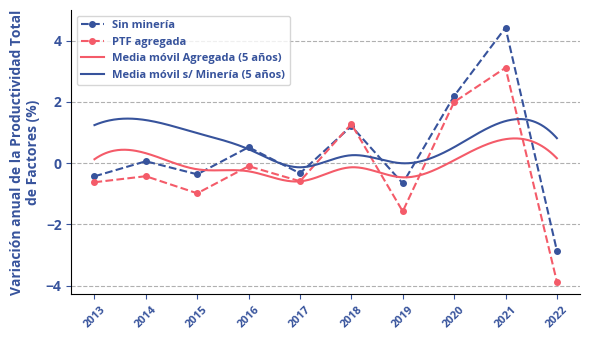

In [33]:
from scipy.interpolate import make_interp_spline

sin_min = [-0.430, 0.062, -0.364, 0.521, -0.331, 1.210, -0.659, 2.193, 4.423, -2.856]
ptf_ag = [-0.623, -0.426, -0.984, -0.098, -0.590, 1.279, -1.574, 1.996, 3.115, -3.869]
ptf_media = [0.12756161579549868, 0.3242839032427809, -0.20030594493603823, -0.26588120809070825,
             -0.5937487688222451, -0.13473243278973215, -0.46260174452962977, 0.09477573522652273,
             0.7833002392752939, 0.16034924737283207]
sin_min_media = [1.242316575307807, 1.4062512311777557, 0.9800207757142154, 0.45543092753539627,
                 -0.13473243278973215, 0.2587103910964748, -0.003585408497116733, 0.5210044396817024,
                 1.3734635996004192, 0.8160861198442666]

X_Y_Spline_ptf = make_interp_spline(years, ptf_media)
X_Y_Spline_sinmin = make_interp_spline(years, sin_min_media)
X_ = np.linspace(np.array(years).min(), np.array(years).max(), 500)
X_Y_Spline_ptf = X_Y_Spline_ptf(X_)
X_Y_Spline_sinmin = X_Y_Spline_sinmin(X_)

fig , ax = plt.subplots(figsize=(6,3.5))
years = list(range(2013, 2023))
ax.plot(years, sin_min, color=COLOR_PALETTE[0],
        linestyle='--', label='Sin minería', markersize=4)
ax.plot(years, ptf_ag, color=COLOR_PALETTE[2],
        linestyle='--', label='PTF agregada', markersize=4)
ax.plot(X_, X_Y_Spline_ptf, '-', color=COLOR_PALETTE[2],
        label='Media móvil Agregada (5 años)')
ax.plot(X_, X_Y_Spline_sinmin, '-', color=COLOR_PALETTE[0],
        label='Media móvil s/ Minería (5 años)')
ax.set_yticks([-4,-2,0,2,4,6])
ax.legend(fontsize=8)
ax.set_xticks(years)
ax.set_ylim(top=5)
ax.tick_params(axis='x', labelsize=8, rotation=45)
ax.set_ylabel('Variación anual de la Productividad Total\nde Factores (%)')
#ax.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig(base_dir+('/ptf.png'))
plt.savefig(base_dir+('/ptf.svg'))

### Ranking complejidad económica

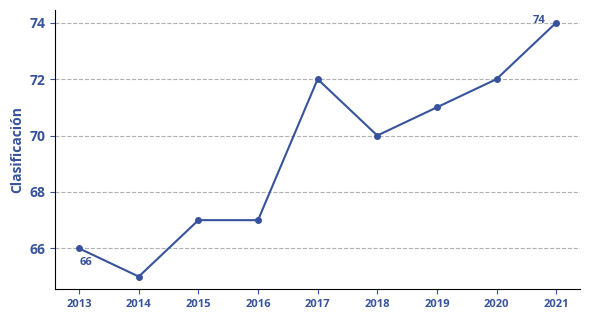

In [34]:
comp = [66, 65, 67, 67, 72, 70, 71, 72, 74]
years = list(range(2013,2022))

fig, ax = plt.subplots(figsize=(6,3.3))
ax.plot(years, comp,
        markersize=4)
#ax.grid(axis='y', linestyle='--')
ax.set_ylabel('Clasificación')
ax.tick_params(axis='x', labelsize=8)
ax.annotate(comp[0], (years[0], comp[0]-0.6), fontsize=8)
ax.annotate(comp[-1], (years[-1]-0.4, comp[-1]), fontsize=8)
plt.tight_layout()
plt.savefig(base_dir+'/rank_complejidad.png')
plt.savefig(base_dir+'/rank_complejidad.svg')
plt.show()

### Desconfianza en instituciones en Chile

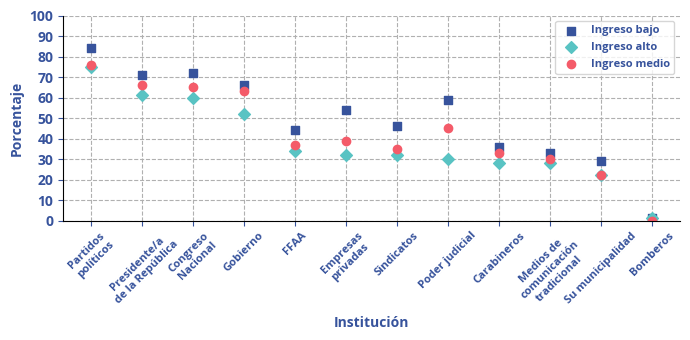

In [23]:
plt.rcParams['axes.axisbelow'] = True
ingreso_bajo = [84, 71, 72, 66, 44, 54, 46, 59, 36, 33, 29, 1]
ingreso_medio = [76, 66, 65, 63, 37, 39, 35, 45, 33, 30, 22, 0]
ingreso_alto = [75, 61, 60, 52, 34, 32, 32, 30, 28, 28, 22, 1]

y = ['Partidos\npolíticos', 'Presidente/a\nde la República', 'Congreso\nNacional', 'Gobierno', 'FFAA', 'Empresas\nprivadas',
     'Sindicatos', 'Poder judicial', 'Carabineros', 'Medios de\ncomunicación\ntradicional',
     'Su municipalidad', 'Bomberos']
fig, ax = plt.subplots(figsize=(7,3.5))
ax.grid(linestyle='--')
ax.set_yticks(list(range(0, 101, 10)))
ax.scatter(y, ingreso_bajo, label='Ingreso bajo', marker='s', color=COLOR_PALETTE[0])#,alpha=0.5)
ax.scatter(y, ingreso_alto, label='Ingreso alto', marker='D', color=COLOR_PALETTE[1])#,alpha=0.5)
ax.scatter(y, ingreso_medio, label='Ingreso medio', marker='o', color=COLOR_PALETTE[2])#,alpha=0.5)

#for i in range(len(y)):
#  ax.annotate(ingreso_bajo[i], (i+0.1, ingreso_bajo[i]+1), fontsize=6, color='blue')
#  ax.annotate(ingreso_medio[i], (i+0.1, ingreso_medio[i]+1), fontsize=6, color='red')
#  ax.annotate(ingreso_alto[i], (i+0.1, ingreso_alto[i]+1), fontsize=6, color='green')
ax.tick_params(axis='x', labelsize=8, rotation=45)
ax.set_ylabel('Porcentaje')
ax.set_xlabel('Institución')
ax.legend(fontsize=8)
ax.set_ylim((0,100))
plt.tight_layout()
plt.savefig(base_dir+'/desconf.png')
plt.savefig(base_dir+'/desconf.svg')
plt.show()

### preferencia de la democracia en comparación con otra forma de gobierno

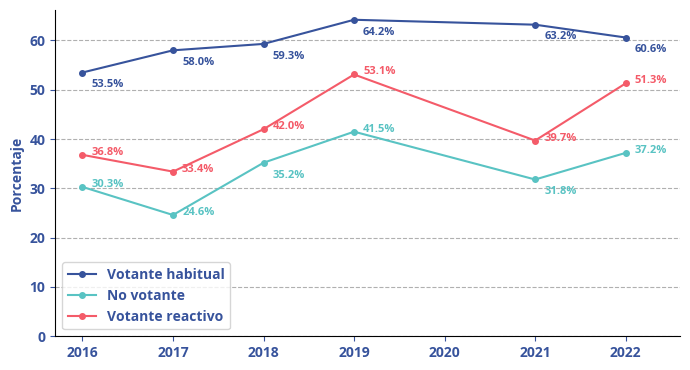

In [24]:
vot_habitual = [53.5, 58.0, 59.3, 64.2, 63.2, 60.6]
no_vot = [30.3, 24.6, 35.2, 41.5, 31.8, 37.2]
vot_react = [36.8, 33.4, 42.0, 53.1, 39.7, 51.3]
years = [2016, 2017, 2018, 2019, 2021, 2022]

fig, ax = plt.subplots(figsize=(7, 3.8))
ax.plot(years, vot_habitual, '-o', label='Votante habitual', markersize=4, color=COLOR_PALETTE[0])
ax.plot(years, no_vot, '-o', label='No votante', markersize=4, color=COLOR_PALETTE[1])
ax.plot(years, vot_react, '-o', label='Votante reactivo', markersize=4, color=COLOR_PALETTE[2])
ax.grid(axis='y', linestyle='--')
for i in range(len(years)):
  ax.annotate(str(vot_habitual[i])+'%', (years[i]+0.1, vot_habitual[i]-3), fontsize=8, color=COLOR_PALETTE[0])
  if i ==2 or i == 4:
    ax.annotate(str(no_vot[i])+'%', (years[i]+0.1, no_vot[i]-3), fontsize=8, color=COLOR_PALETTE[1])
  else:
    ax.annotate(str(no_vot[i])+'%', (years[i]+0.1, no_vot[i]), fontsize=8, color=COLOR_PALETTE[1])
  ax.annotate(str(vot_react[i])+'%', (years[i]+0.1, vot_react[i]), fontsize=8, color=COLOR_PALETTE[2])
ax.set_ylim(bottom=0)
ax.set_xlim(right=2022.6)
ax.legend()
ax.set_ylabel('Porcentaje')
plt.tight_layout()
plt.savefig(base_dir+'/democracia.png')
plt.savefig(base_dir+'/democracia.svg')
plt.show()